<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/M%C3%A9todo_Explicito_Ecuaci%C3%B3n_De_Calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación de calor mediante método explixcito de diferencias progresivas.
**Esta notebook resuelve el siguiente problema:**



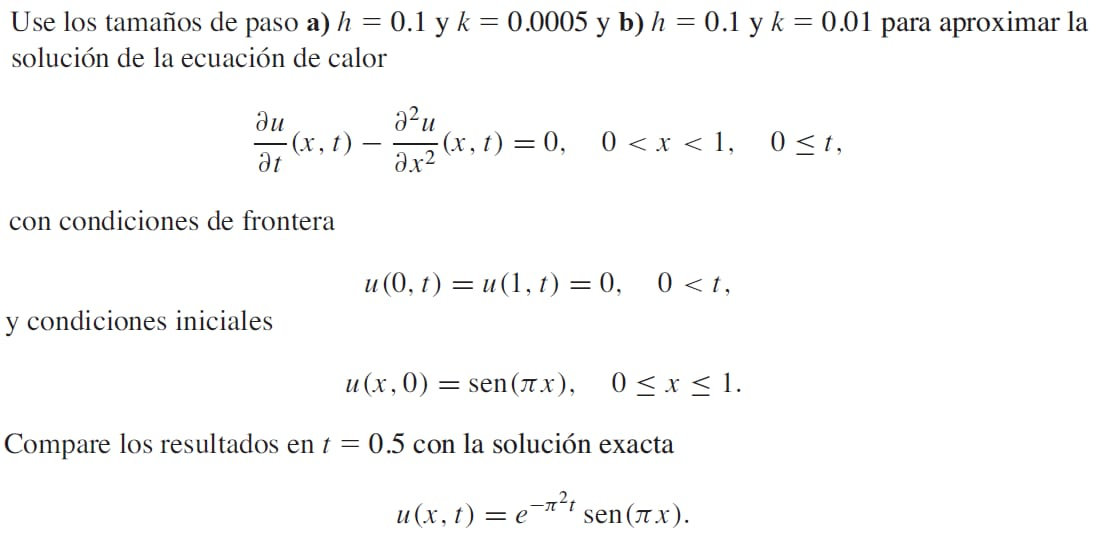


Comenzamos con el código que realiza el procedimiento oara el valor de los nodos.


In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# función analítica
def u_exact(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

# Método explicito.
def solve_explicit(h, k, t_final):
    """
    Resuelve la ecuación del calor con diferencias progresivas hacia delante.
      u_i^{n+1} = u_i^n + r (u_{i+1}^n - 2 u_i^n + u_{i-1}^n)
    con r = k / h^2.

    Parámetros:
      h: paso espacial
      k: paso temporal
      t_final: tiempo final donde se quiere la solución

    Devuelve:
      x: nodos espaciales (numpy array)
      u: solución numérica en t_final (numpy array)
      r: (k/h^2)
      Nsteps: número de pasos temporales realizados
    """
    r = k / h**2
    # nodos internos más extremos
    x = np.arange(0, 1 + 1e-12, h)  # incluye 1
    M = len(x)
    # condición inicial
    u = np.sin(np.pi * x)  # incluye bordes (serán 0)
    Nsteps = int(np.ceil(t_final / k))
    # En caso de que t_final no sea múltiplo exacto, se ajusta k_last para llegar a t_final
    # Aquí usamos pasos constantes y tomamos Nsteps tal que Nsteps*k >= t_final, luego no ajustamos el último paso
    for n in range(Nsteps):
        u_new = u.copy()
        # actualizar nodos internos 1..M-2 (bordes 0 y M-1 fijos en 0)
        u_new[1:-1] = u[1:-1] + r * (u[2:] - 2*u[1:-1] + u[:-2])
        u = u_new
    return x, u, r, Nsteps


Procedimiento que imprime las tablas de resultados para las aproximaciones de ambos incisos.

In [2]:
# Parámetros solicitados
h = 0.1
cases = [
    {'k': 0.0005, 'label': 'k=0.0005'},
    {'k': 0.01,   'label': 'k=0.01'}
]
t_final = 0.5

results = []

for case in cases:
    k = case['k']
    x, u_num, r, Nsteps = solve_explicit(h, k, t_final)
    u_ex = u_exact(x, t_final)
    abs_err = np.abs(u_ex - u_num)
    # Guardar resultados en una tabla similar a la mostrada en el enunciado
    df = pd.DataFrame({
        'x_i': np.round(x, 10),
        'u_exact(x,0.5)': np.round(u_ex, 9),
        f'u_num({case["label"]})': np.round(u_num, 9),
        f'|u_exact - u_num|': np.round(abs_err, 9)
    })
    results.append({'case': case, 'x': x, 'u_num': u_num, 'u_ex': u_ex, 'abs_err': abs_err, 'df': df, 'r': r, 'Nsteps': Nsteps})

# Mostrar tablas (en particular los nodos 0.0,0.1,...,1.0) para cada caso
for res in results:
    print('\n--- Caso:', res['case']['label'], '---')
    print('h =', h, ', k =', res['case']['k'], ', r = k/h^2 =', res['r'], ', Nsteps =', res['Nsteps'])
    display(res['df'])



--- Caso: k=0.0005 ---
h = 0.1 , k = 0.0005 , r = k/h^2 = 0.04999999999999999 , Nsteps = 1000


,x_i,"u_exact(x,0.5)",u_num(k=0.0005),|u_exact - u_num|
0,0.0,0.000000,0.000000,0.000000
1,0.1,0.002222,0.002287,0.000064
2,0.2,0.004227,0.004349,0.000122
3,0.3,0.005818,0.005986,0.000168
4,0.4,0.006840,0.007037,0.000197
5,0.5,0.007192,0.007399,0.000207
6,0.6,0.006840,0.007037,0.000197
7,0.7,0.005818,0.005986,0.000168
8,0.8,0.004227,0.004349,0.000122
9,0.9,0.002222,0.002287,0.000064



--- Caso: k=0.01 ---
h = 0.1 , k = 0.01 , r = k/h^2 = 0.9999999999999998 , Nsteps = 50


,x_i,"u_exact(x,0.5)",u_num(k=0.01),|u_exact - u_num|
0,0.0,0.000000,0.000000,0.000000
1,0.1,0.002222,-158422.838864,158422.841086
2,0.2,0.004227,305172.399216,305172.394989
3,0.3,0.005818,-428253.938791,428253.944609
4,0.4,0.006840,515620.221554,515620.214715
5,0.5,0.007192,-556349.995657,556350.002849
6,0.6,0.006840,542621.642363,542621.635523
7,0.7,0.005818,-471943.155403,471943.161222
8,0.8,0.004227,348861.615829,348861.611602
9,0.9,0.002222,-185424.259673,185424.261895


Gráficamos ambos resultados, comparando entre la solucion analitica y la numérica.

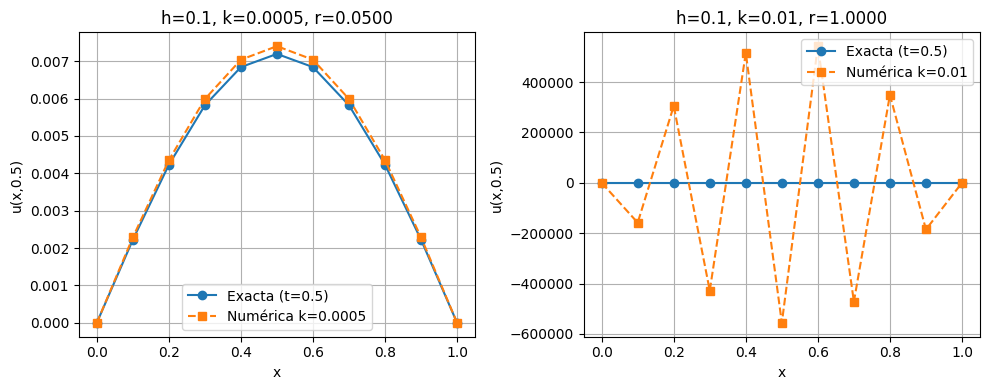

In [3]:
# Graficar comparación numérica vs analítica
plt.figure(figsize=(10,4))
for i, res in enumerate(results):
    plt.subplot(1,2,i+1)
    plt.plot(res['x'], res['u_ex'], marker='o', linestyle='-', label='Exacta (t=0.5)')
    plt.plot(res['x'], res['u_num'], marker='s', linestyle='--', label=f'Numérica {res["case"]["label"]}')
    plt.title(f'h={h}, {res["case"]["label"]}, r={res["r"]:.4f}')
    plt.xlabel('x')
    plt.ylabel('u(x,0.5)')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusiones sobre el error.

Por lo visto en clase, el parametro **r = α²k/h²** es un parametro de sensibilidad para la convergencia del método. Se exige que **0 ≤ r ≤ 1/2** para que la aproximación del método sea estable. De esto, podemos recabar de las gráficas que:

- Para **h = 0.1**:
  - Si **k = 0.0005**, entonces \(r = 0.0005 / 0.01 = 0.05\) y como sucede que **0 ≤ r ≤ 1/2**, el método es estable y la aproximación es más acertada.
  - Si **k = 0.01**, entonces \(r = 0.01 / 0.01 = 1.0\), y como sucede que **r = 1 → r > 1/2** el método es inestable, lo que produce una aproximacion no convergente como se puede ver en la segunda imagen de arriba.


Por último, en la siguiente tabla se compilan todos los datos recabados, tanto de las soluciones numericas como los errorres entre cada iteración.

In [4]:
# Crear tabla compacta con filas en x = 0.0,0.1,...,1.0 y formato similar al ejemplo
x_nodes = np.round(np.arange(0, 1.0001, 0.1), 10)

summary_rows = []
for xi in x_nodes:
    row = {'x_i': xi, 'u_exact(x,0.5)': u_exact(xi, t_final)}
    for res in results:
        # find index of xi
        idx = int(round(xi / h))
        u_n = res['u_num'][idx]
        row[f'u_num_{res["case"]["label"]}'] = u_n
        row[f'|diff_{res["case"]["label"]}|'] = abs(u_exact(xi, t_final) - u_n)
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows)
# mostrar en formato legible
summary_df_round = summary_df.copy()
for c in summary_df_round.columns:
    if c != 'x_i':
        summary_df_round[c] = summary_df_round[c].apply(lambda z: f"{z:.6g}")
display(summary_df_round)


,x_i,"u_exact(x,0.5)",u_num_k=0.0005,|diff_k=0.0005|,u_num_k=0.01,|diff_k=0.01|
0,0.0,0,0,0,0,0
1,0.1,0.00222241,0.00228652,6.41066e-05,-158423,158423
2,0.2,0.00422728,0.00434922,0.000121938,305172,305172
3,0.3,0.00581836,0.00598619,0.000167833,-428254,428254
4,0.4,0.00683989,0.00703719,0.0001973,515620,515620
5,0.5,0.00719188,0.00739934,0.000207453,-556350,556350
6,0.6,0.00683989,0.00703719,0.0001973,542622,542622
7,0.7,0.00581836,0.00598619,0.000167833,-471943,471943
8,0.8,0.00422728,0.00434922,0.000121938,348862,348862
9,0.9,0.00222241,0.00228652,6.41066e-05,-185424,185424
